In [ ]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/exoplanet_data.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2024-07-19 23:29:26--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/exoplanet_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 619568 (605K) [text/plain]
Saving to: ‘exoplanet_data.csv.1’

exoplanet_data.csv. 100%[===================>] 605.05K  --.-KB/s    in 0.03s   

2024-07-19 23:29:26 (20.5 MB/s) - ‘exoplanet_data.csv.1’ saved [619568/619568]



# Challenge Problem 2: Exoplanets with Pandas

Before loading it into Python, open up the file named `exoplanet_data.csv` and take a quick look at its contents. The file starts with many lines of comments. In particular, there are descriptions of each of the columns included in the file. Most of them are somewhat clear, but there are two that aren't which you should ignore when doing the problem, which I will describe briefly.
*    `loc_rowid`: The table in the file doesn't actually correspond to the whole database, so the values in this column tell you the original row indices in the full dataset.
*    `default_flag`: For each planet, there can be more than one "solution" for the set of observations. This flag indicates whether the row is the "default" solution. I chose only the subset of rows where this value is 1, corresponding to the default solutions.

One important thing to mention is that I downloaded a version of this data excluding the error bars. In reality, all these measurements come with some amount of uncertainty.

Now, open the file using `pd.read_csv`.
*   The file is already comma-separated, so no need to pass a separator
*   You can use either `header=0` or pass your own list of names if you don't like the ones in the file.
*   You can optionally exclude the two columns I mentioned above with `usecols` but it's probably more trouble than it's worth.
*   You want to ignore the lines of comments, so make sure to use `comment=#`.

In [ ]:
!cat exoplanet_data.csv

# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
# Mon May 23 11:19:13 2022
#
# User preference: *
#
# CONSTRAINT:  where (default_flag = 1)
#
# COLUMN pl_name:        Planet Name
# COLUMN hostname:       Host Name
# COLUMN default_flag:   Default Parameter Set
# COLUMN sy_snum:        Number of Stars
# COLUMN sy_pnum:        Number of Planets
# COLUMN discoverymethod: Discovery Method
# COLUMN disc_year:      Discovery Year
# COLUMN pl_orbper:      Orbital Period [days]
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])
# COLUMN pl_rade:        Planet Radius [Earth Radius]
# COLUMN pl_radj:        Planet Radius [Jupiter Radius]
# COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]
# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]
# COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance
# COLUMN pl_orbeccen:    Eccentricity
# COLUMN pl_eqt:         Equilibrium Temperature [K]
# COLUMN ttv_flag:       Da

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
df = pd.read_csv('exoplanet_data.csv', comment='#')
df

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_eqt,ttv_flag,st_teff,st_rad,st_mass,sy_dist
0,1,11 Com b,11 Com,1,2,1,Radial Velocity,2007,326.030000,1.290000,NaN,NaN,6165.60000,19.4000,Msini,0.2310,NaN,0,4742.0,19.00,2.70,93.1846
1,4,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,516.219970,1.530000,NaN,NaN,4684.81420,14.7400,Msini,0.0800,NaN,0,4213.0,29.79,2.78,125.3210
2,7,14 And b,14 And,1,1,1,Radial Velocity,2008,185.840000,0.830000,NaN,NaN,1525.50000,4.8000,Msini,0.0000,NaN,0,4813.0,11.00,2.20,75.4392
3,13,14 Her b,14 Her,1,1,2,Radial Velocity,2002,1773.400020,2.930000,NaN,NaN,1481.08780,4.6600,Msini,0.3700,NaN,0,5338.0,0.93,0.90,17.9323
4,16,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,798.500000,1.660000,NaN,NaN,565.73740,1.7800,Msini,0.6800,NaN,0,5750.0,1.13,1.08,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025,32515,ups And b,ups And,1,2,3,Radial Velocity,1996,4.617033,0.059222,NaN,NaN,218.53100,0.6876,Msini,0.0215,NaN,0,NaN,1.56,1.30,13.4054
5026,32522,ups And c,ups And,1,2,3,Radial Velocity,1999,241.258000,0.827774,NaN,NaN,629.59500,1.9810,Msini,0.2596,NaN,0,NaN,1.56,1.30,13.4054
5027,32527,ups And d,ups And,1,2,3,Radial Velocity,1999,1276.460000,2.513290,NaN,NaN,1313.22000,4.1320,Msini,0.2987,NaN,0,NaN,1.56,1.30,13.4054
5028,32530,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,385.200000,1.180000,NaN,NaN,162.09249,0.5100,Msini,0.3200,NaN,0,4836.0,11.22,1.48,52.5973


Your main tasks:
1.   For starters, how many rows does the DataFrame contain? This translates to the total number of confirmed exoplanets.
2.   How many different exoplanet detection methods are there? You can get the unique values of a column by using the method `df['Columnname'].unique()`.
3.   Make a cumulative histogram showing how the number of known exoplanets has grown over time. Make a second version where you break this down by detection method. Do you notice any years with very drastic increases?


In [ ]:
print(f'The data frame has {df.shape[0]} rows and {df.shape[1]} columns.')

The data frame has 5030 rows and 22 columns.


In [ ]:
df['discoverymethod'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Disk Kinematics',
       'Orbital Brightness Modulation', 'Pulsation Timing Variations',
       'Microlensing', 'Transit Timing Variations', 'Pulsar Timing'],
      dtype=object)

In [ ]:
print(f"There were {len(df['discoverymethod'].unique()):d} methods used.")

There were 11 methods used.


Text(0.5, 0, 'Discovery Year')

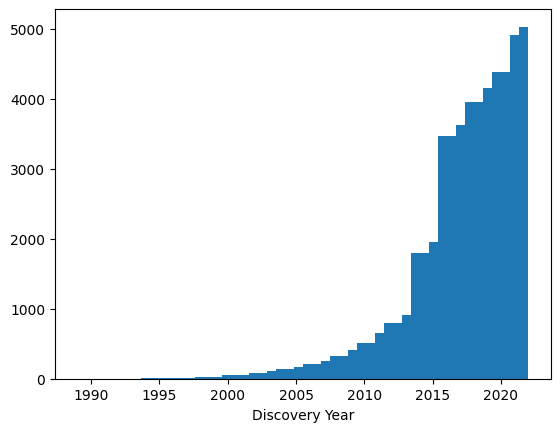

In [ ]:
plt.hist(df['disc_year'], cumulative=True, bins=50)
plt.xlabel('Discovery Year')

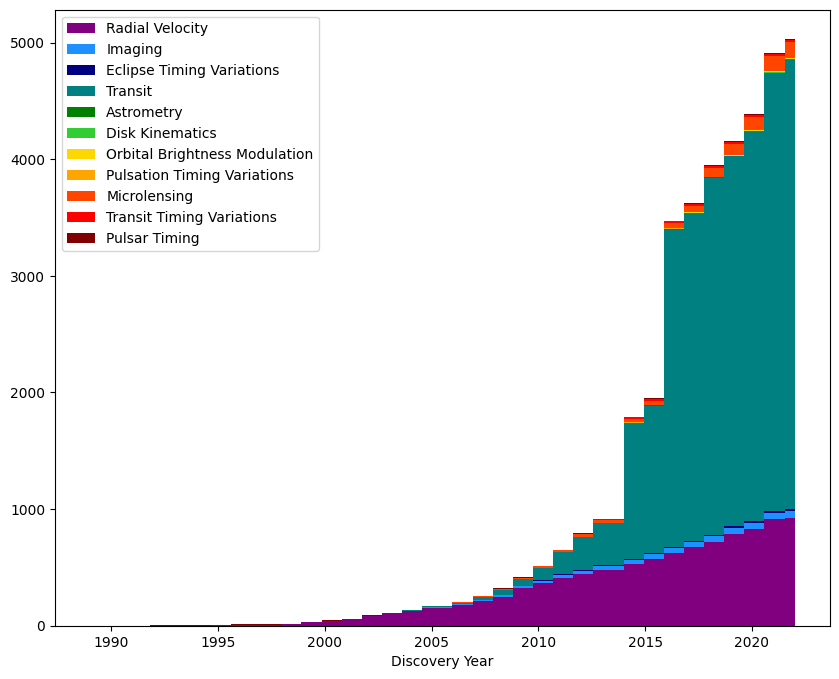

In [ ]:
df_list = []
plt.figure(figsize=(10,8))
for method in df.discoverymethod.unique():
    df_list.append(df[df.discoverymethod==method].disc_year.values)
cs = ['purple', 'dodgerblue', 'navy', 'teal', 'green', 'limegreen', 'gold', 'orange', 'orangered', 'red', 'maroon']
plt.hist(df_list, stacked=True, bins=int(np.sqrt(len(df.index))),label=df.discoverymethod.unique(),cumulative=True, color=cs)
plt.xlabel('Discovery Year')
plt.legend()

Optional tasks if you have time:
*   Now, make some histograms of some of the physical values, including exoplanet radius, semimajor axis, host star mass, etc. For your histogram of the exoplanet mass, restrict yourself to the rows where `bl_pmassprov=='Mass'` instead of `Msini`. Do you notice anything interesting? For example, you should find that most host stars will have masses around 1 solar mass. This is because most exoplanet surveys have purposefully targeted stars similar to our own Sun. Other things to look into: Are there more planets further away than close to us? Does planetary radius or mass seem to peak at any specific values?
*   Kepler derived his third law from actual observations of the solar system planets where he plotted the semimajor axis vs the orbital period. Try doing this with log-log axes. When you do this for the solar system planets, you get a straight line. What do you notice in this case?
*   Is there any correlation between distance from the star and planetary mass or radius? Make some scatter plots to investigate this.
*   From the planetary mass and radius, you can get the planetary density. Make a histogram of this. What do you notice?
*   Anything else you can think of! Try stuff out.

Keep in mind that some of the conclusions you draw here might not be true. Observations are prone to some level of bias, also known as "selection effects". For example, it's very hard to directly image exoplanets that are small and close to their host star, so the method of direct imaging is biased towards larger exoplanets and larger distances. Each detection method is biased in some way, so take some of your conclusions with a grain of salt.

In [ ]:
df_new = df[df['pl_bmassprov']=='Mass'].copy()
df_new

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_eqt,ttv_flag,st_teff,st_rad,st_mass,sy_dist
7,25,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,1,Imaging,2008,NaN,330.00000,NaN,NaN,3000.00000,8.00000,Mass,NaN,1700.0,0,4060.0,NaN,0.85,139.13500
11,31,2M0437 b,2MASS J04372171+2651014,1,1,1,Imaging,2021,NaN,118.00000,NaN,NaN,1271.31363,4.00000,Mass,NaN,1450.0,0,3100.0,0.84,0.17,128.48400
12,32,2MASS J01033563-5515561 AB b,2MASS J01033563-5515561 A,1,2,1,Imaging,2013,NaN,84.00000,NaN,NaN,4131.79000,13.00000,Mass,NaN,NaN,0,NaN,NaN,0.19,NaN
13,34,2MASS J01225093-2439505 b,2MASS J01225093-2439505,1,1,1,Imaging,2013,NaN,52.00000,NaN,NaN,7786.50000,24.50000,Mass,NaN,NaN,0,3530.0,NaN,0.40,33.82810
14,35,2MASS J02192210-3925225 b,2MASS J02192210-3925225,1,1,1,Imaging,2015,NaN,156.00000,16.141,1.440,4417.83700,13.90000,Mass,NaN,NaN,0,3064.0,0.28,0.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,32455,eps Ind A b,eps Ind A,1,3,1,Radial Velocity,2019,16510.0000,11.55000,NaN,NaN,1032.94750,3.25000,Mass,0.260,NaN,0,NaN,NaN,0.75,3.63857
5006,32471,kap And b,kap And,1,1,1,Imaging,2012,NaN,55.00000,NaN,NaN,4327.36000,13.61600,Mass,NaN,1900.0,0,10900.0,NaN,2.60,50.01770
5009,32483,nu Oph b,nu Oph,1,1,2,Radial Velocity,2012,530.2100,1.79000,NaN,NaN,7057.73298,22.20600,Mass,0.124,NaN,0,4886.0,14.60,2.70,46.21070
5010,32485,nu Oph c,nu Oph,1,1,2,Radial Velocity,2012,3184.8300,5.93100,NaN,NaN,7838.32346,24.66200,Mass,0.180,NaN,0,4886.0,14.60,2.70,46.21070


<Axes: >

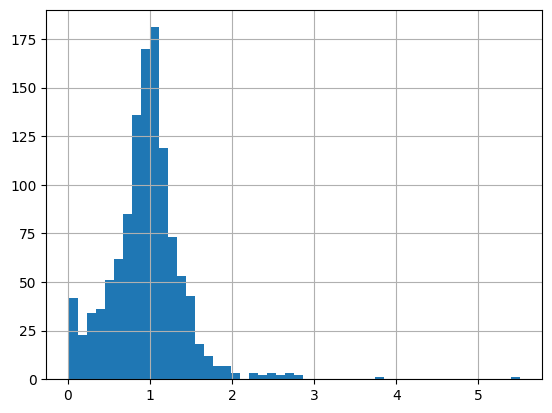

In [ ]:
df_new['st_mass'].hist(bins=50)

<Axes: >

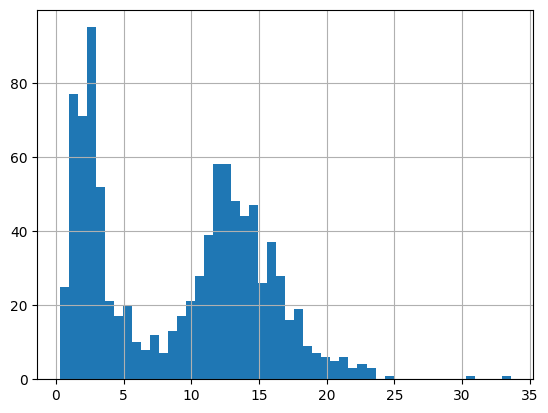

In [ ]:
df_new['pl_rade'].hist(bins=50)

<Axes: >

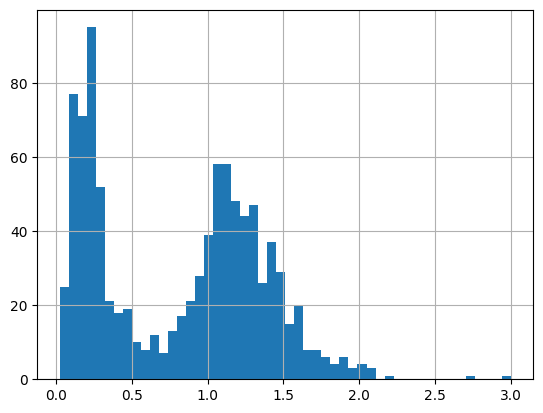

In [ ]:
df_new['pl_radj'].hist(bins=50)

<Axes: >

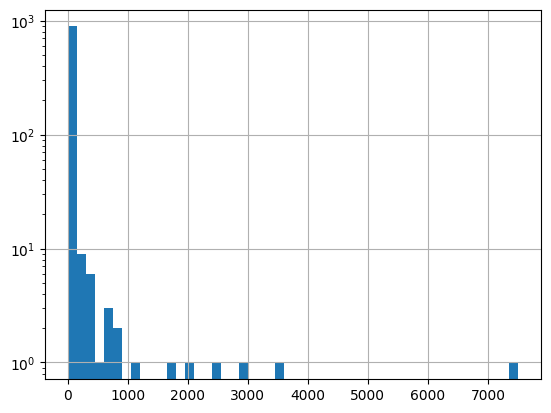

In [ ]:
df_new['pl_orbsmax'].hist(bins=50, log='True')

(0.0, 5.0)

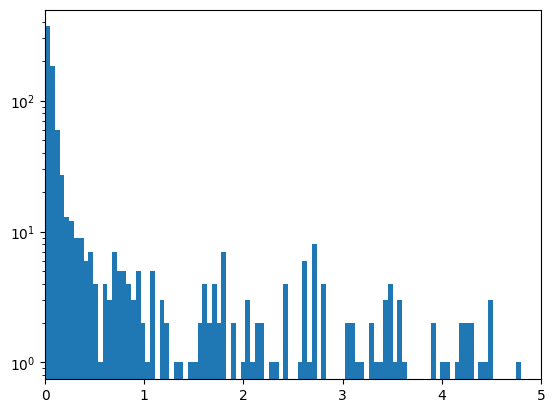

In [ ]:
df_close = df_new[df_new['pl_orbsmax']<5]

plt.hist(df_close['pl_orbsmax'], bins=100, log='True')
plt.xlim(0,5)

(0.0, 0.5)

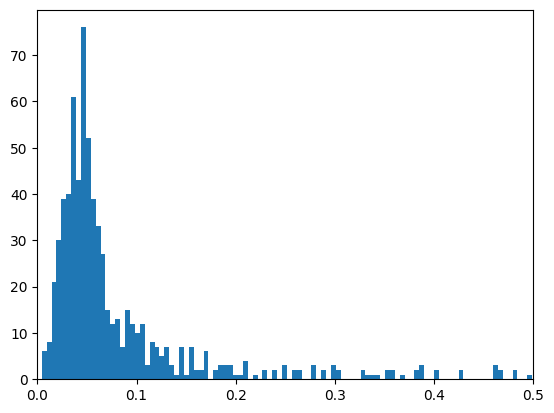

In [ ]:
df_close = df_new[df_new['pl_orbsmax']<0.5]

plt.hist(df_close['pl_orbsmax'], bins=100)
plt.xlim(0,0.5)

In [ ]:
df_close

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_eqt,ttv_flag,st_teff,st_rad,st_mass,sy_dist
31,108,55 Cnc e,55 Cnc,1,2,5,Radial Velocity,2004,0.736547,0.01544,1.875,0.167,7.99000,0.02514,Mass,0.050,NaN,0,5172.0,0.94,0.91,12.5855
46,148,AU Mic b,AU Mic,1,1,2,Transit,2020,8.462999,0.06450,NaN,NaN,20.12000,0.06330,Mass,0.186,NaN,1,NaN,NaN,0.50,9.7221
47,150,AU Mic c,AU Mic,1,1,2,Transit,2021,18.858991,0.11010,NaN,NaN,9.60000,0.03020,Mass,NaN,NaN,0,NaN,NaN,0.50,9.7221
81,203,CoRoT-10 b,CoRoT-10,1,1,1,Transit,2010,13.240600,0.10550,10.870,0.970,874.00000,2.75000,Mass,0.530,600.0,0,5075.0,0.79,0.89,338.3860
82,207,CoRoT-11 b,CoRoT-11,1,1,1,Transit,2010,2.994330,0.04360,16.030,1.430,740.51000,2.33000,Mass,0.000,1657.0,0,6440.0,1.37,1.27,655.0370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,32384,XO-2 N b,XO-2 N,1,2,3,Transit,2007,2.615862,0.03680,11.131,0.993,179.89178,0.56600,Mass,NaN,NaN,0,NaN,0.99,0.97,154.2730
4981,32413,XO-5 b,XO-5,1,1,1,Transit,2008,4.187756,0.05150,12.780,1.140,378.20000,1.19000,Mass,0.000,1230.0,0,5430.0,1.13,1.04,276.2110
4982,32422,XO-6 b,XO-6,1,1,1,Transit,2016,3.765001,0.08150,23.203,2.070,1398.45200,4.40000,Mass,0.000,1577.0,0,6720.0,1.93,1.47,235.4790
4983,32424,XO-7 b,XO-7,1,1,1,Transit,2019,2.864142,0.04421,15.390,1.373,225.34147,0.70900,Mass,0.038,1743.0,0,6250.0,1.48,1.41,234.1490


In [ ]:
len(df_close['discoverymethod'].unique())

7

Text(0.5, 0, 'Semi-Major Axis')

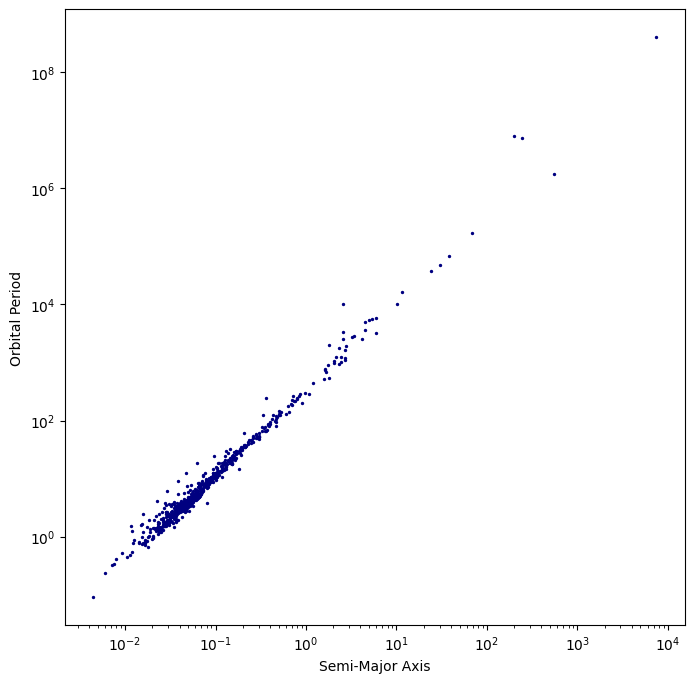

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df_new['pl_orbsmax'], df_new['pl_orbper'], s=2, c='navy')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Orbital Period')
plt.xlabel('Semi-Major Axis')

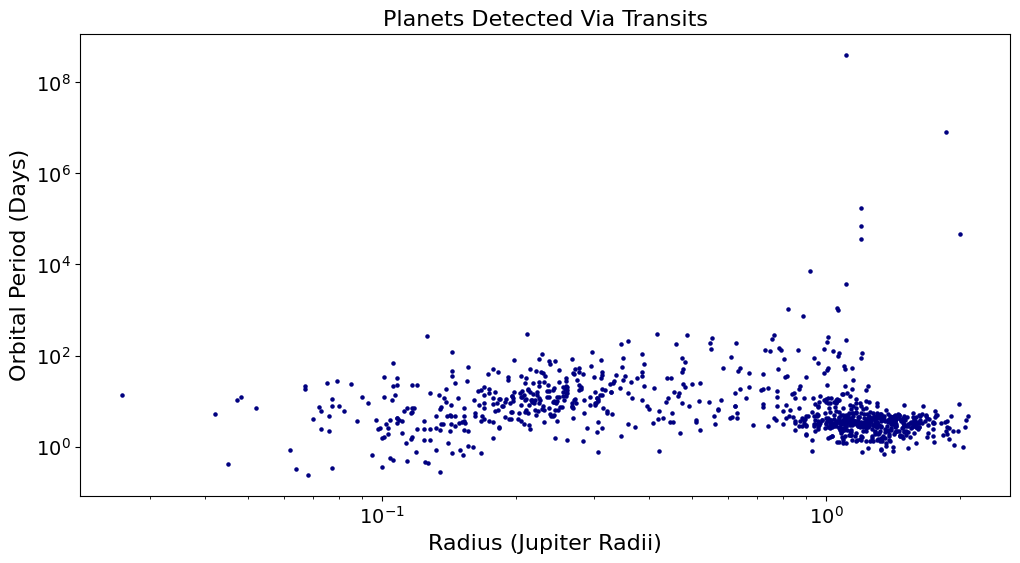

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df_new.pl_radj,df_new.pl_orbper, c='navy', s=5)
plt.xlabel('Radius (Jupiter Radii)', fontsize=16)
plt.ylabel('Orbital Period (Days)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.title('Planets Detected Via Transits', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

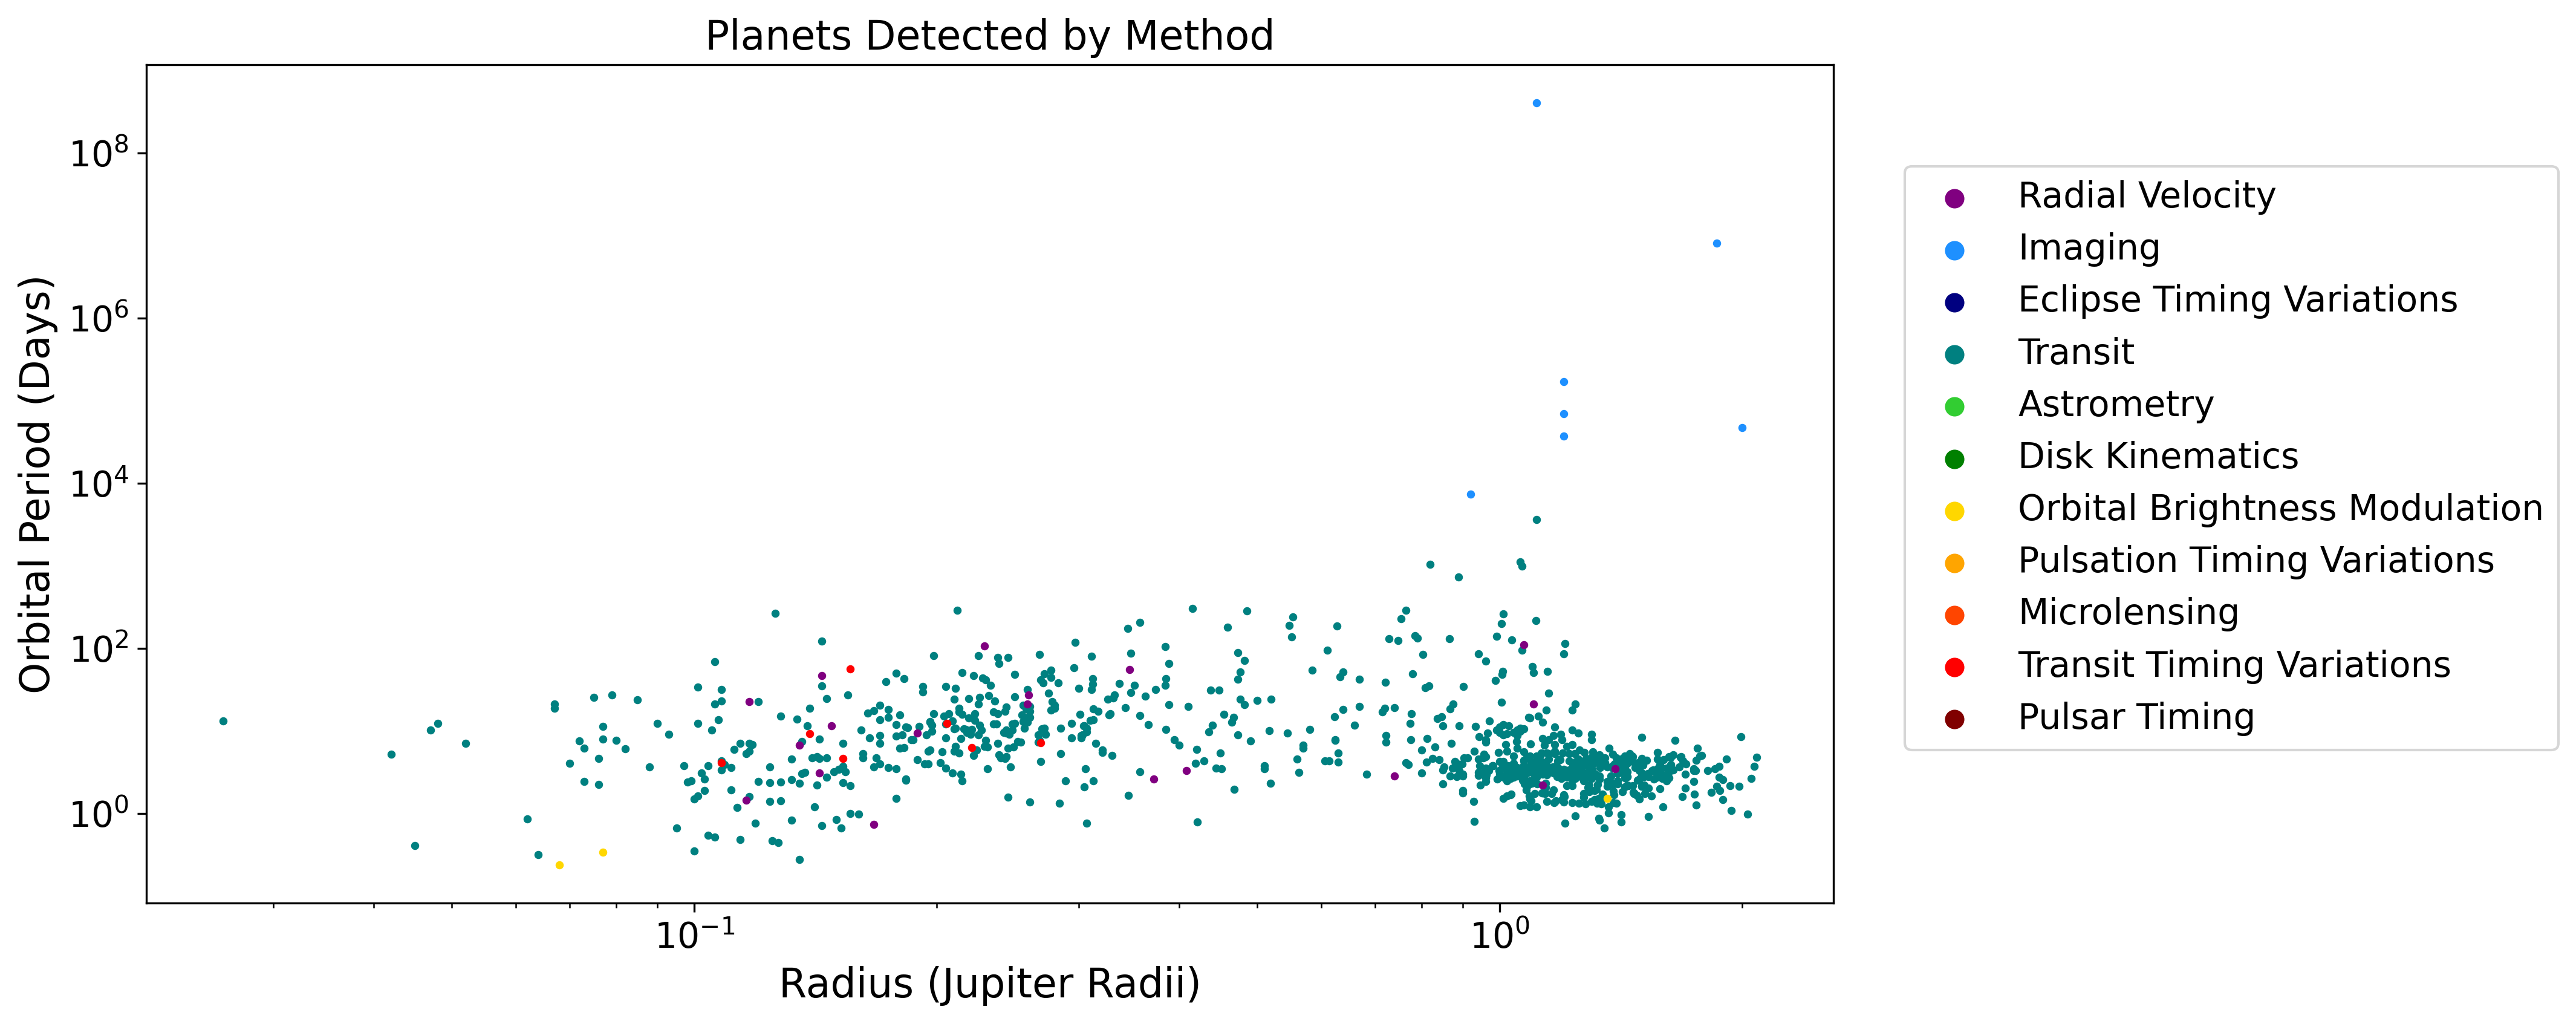

In [ ]:
fig, ax = plt.subplots(figsize=(12,6), dpi=300)
cs = ['purple', 'dodgerblue', 'navy', 'teal', 'limegreen', 'green', 'gold', 'orange', 'orangered', 'red', 'maroon']
zorderlist = [2, 3, 4, 1, 5, 6, 7, 8, 9, 10, 11]
for i, method in enumerate(df.discoverymethod.unique()):
    plt.scatter(df_new[df_new.discoverymethod==method].pl_radj, df_new[df_new.discoverymethod==method].pl_orbper,label=method, s=5, color=cs[i], zorder=zorderlist[i])
plt.xlabel('Radius (Jupiter Radii)', fontsize=16)
plt.ylabel('Orbital Period (Days)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.title('Planets Detected by Method', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(bbox_to_anchor=(0.94, 0.4, 0.5, 0.5), fontsize=14, markerscale=3)

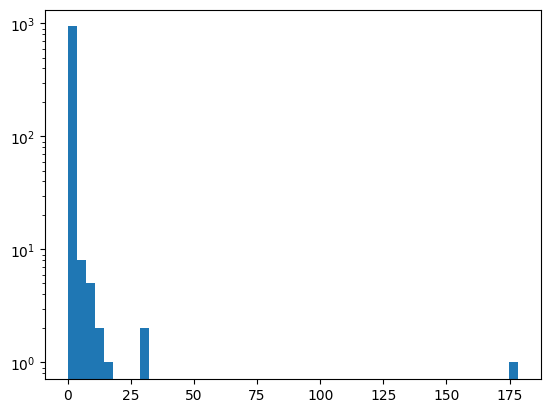

In [ ]:
volume = (4/3)*np.pi*(df_new['pl_rade'])**3
density = df_new['pl_bmasse']/volume
plt.hist(density, bins=50)
plt.yscale('log')